<h1>Group 5</h1>

<h3>HW 7</h3>

<h3>Grayson Felt, Hayden Clegg, Beau Denhalter, Mitchell Green, Tommy Martineau</h3>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
rand_state = 1000

Import the bikeshare.csv as a data frame and name it as df

In [32]:
df = pd.read_csv('bikeshare.csv')

<h3> Part 1: KNN Regression </h3>

1. Drop the dteday variable and then define your feature space and target variables. Split the data into test (20%) and train set (80%)

In [33]:
from sklearn.model_selection import train_test_split

df.drop('dteday',axis=1, inplace=True)

df = pd.get_dummies(df, drop_first=True)

y = df['cnt']
X = df.drop('cnt', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

2. From sklearn.neighbors import the relevant function for KNN regression.

In [34]:
from sklearn.neighbors import KNeighborsRegressor

    2.1 Train all the model with the default features.

In [35]:
KNN_regression = KNeighborsRegressor()
KNN_regression.fit(x_train, y_train)

KNeighborsRegressor()

    2.2 Make predictions on the test set and save them as y_hat

In [36]:
y_hat = KNN_regression.predict(x_test)

    2.3 Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part

In [37]:
df_predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_predictions.head()

,y_test,y_hat
4495,26,38.2
4418,47,51.6
7141,11,13.2
14765,205,217.6
16541,65,81.4


    2.4 Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model?

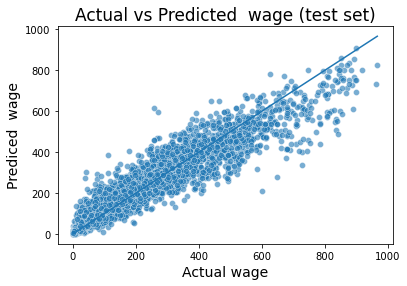

In [38]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

    2.5 Report the RMSE_test for the KNN regression model.

In [39]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

3543.19

In [40]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

59.52

3. Cross validation

    3.1 Estimate the RMSE_test by doing a 5 fold cross validation on the train set and name it as RMSE_CV.

In [41]:
from sklearn.model_selection import cross_val_score

NMSE = cross_val_score(estimator = KNN_regression, X = x_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

62.1758

    3.2 Plot the RMSE_CV vs K and find the optimal value for K in the KNN regression model.

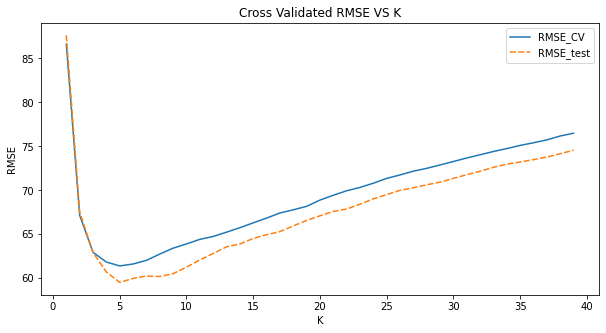

4

In [42]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(x_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = x_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(x_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2)}, index=range(1,k))

plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()
np.argmin(optimal_k['RMSE_CV'])

The optimal K value is 4

<h3> Part 2: KNN Classification </h3>

1. Define a binary target variable overload. Overload=1 if cnt>500 and 0 otherwise. What are the proportions of overload vs non-overload in your data set? Is the target variable balanced or imbalanced?

In [5]:
overload = np.where(df['cnt'] > 500, 1, 0)
pd.crosstab(overload, overload, normalize='all')*100

col_0,0,1
row_0,,
0,92.640543,0.000000
1,0.000000,7.359457


With the large amount of observations we have, this is a relatively balanced data set.

2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

df = pd.read_csv('bikeshare.csv')

df.drop('dteday',axis=1, inplace=True)

df = pd.get_dummies(df, drop_first=True)

y = overload
X = df.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

3. From sklearn.neighbors import the relevant function for KNN classification.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

    3.1 Train the KNN classification model using its default parameters.

In [8]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

    3.2 Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively.

In [9]:
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 

    3.3 Plot the histogram of y_hat_probs? Explain what you see? Is there a probability threshold at which the model always predict negative or positive?

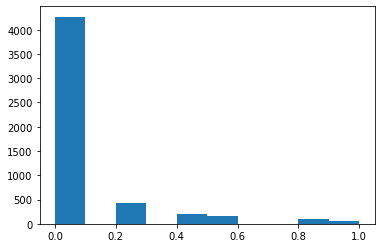

In [10]:
plt.hist(y_hat_probs)
plt.show()

    3.4 Generate predicted classifications for two different thresholds (30% and 70% threshold). Save these new predictions as y_hat_30 and y_hat_70. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer.

In [11]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

    3.5 Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous parts

In [12]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})

4. Borrow my_KNN_report() function from the python notebook of class 13.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

    4.1 Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why? 

In [14]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5)

-----------------------------------------
Accuracy  = 0.9605
Error_rate  = 0.0395
Precision = 0.79
Recall    = 0.65
f1_score  = 0.71
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4750,69
Actual : positive,137,258


    4.2 Now use threshold = 0.3 in the my_logistic_report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 5.4?

In [27]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3)

-----------------------------------------
Accuracy  = 0.9492
Error_rate  = 0.0508
Precision = 0.62
Recall    = 0.83
f1_score  = 0.71
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4620,199
Actual : positive,66,329


5. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)?

Yes it is doing much better than random since the curve extends far into the top left corner. 

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.956


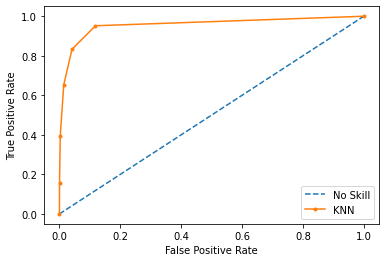

In [16]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

6. Cross validation

    6.1 Estimate the error_rate_test by doing a 5 fold cross validation on the train set and name it as error_rate_CV.

In [18]:
from sklearn.model_selection import cross_val_score

error_rate_test = []
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 'error_rate_test':error_rate_test}, index=range(1,k))

ValueError: level name error_rate_test is not the name of the index

    6.2 Plot the error_rate_CV vs K and find the optimal value for K in the KNN classification model.

In [25]:
optimal_k[optimal_k.error_rate_test == optimal_k.error_rate_test.min()]

,error_rate_CV,error_rate_test
9,0.038964,0.037399


The error_rate_test minimizing K value is 9

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

7. As the manager of Capital Bikeshare, you are dealing with a trade of between unexpected overload cost and cost of idle bikes. If the cost of a single idle bike is smaller than the cost of a single unexpected overload, then which of the following probability thresholds would satisfy your objective? 0.3, 0.5 or 0.7? Hint: idle bike = False overload and unexpected overload = False non-overload